# 독립 표본 검정
독립 표본 검정은 서로 독립적인 두 집단(예: 남성과 여성, 두 지역의 주민 등)의 평균이나 비율이 통계적으로 유의미하게 다른지를 판단하기 위한 방법입니다. 주로 독립표본 t-검정이 사용되며, 두 집단의 평균을 비교할 때, 각 집단의 데이터가 정규분포를 따르고 분산이 동일하다는 가정을 전제로 합니다. 만약 분산이 다르다면 Welch의 t-검정(Welch's t-test)을 사용하게 됩니다.

* 정규성 검정: 각 집단의 데이터가 정규분포를 따르는지 확인합니다. 대표적으로 Shapiro-Wilk 검정을 사용합니다.
* 분산의 동질성 검정: 두 집단의 분산이 동일한지 확인합니다. Levene 검정이나 Bartlett 검정을 사용할 수 있습니다.

In [ ]:
# 차이가 아니고, 각 집단의 데이터에 대해 정규분포를 따르는지 확인하는 것 

In [1]:
# 귀무가설: 반별 수학 평균 점수는 같다.
# 대립가설: 반별 수학 평균 점수는 다르다.  =  차이가 있다

class1 = [85, 90, 92, 88, 86, 89, 83, 87]
class2 = [80, 82, 88, 85, 84]

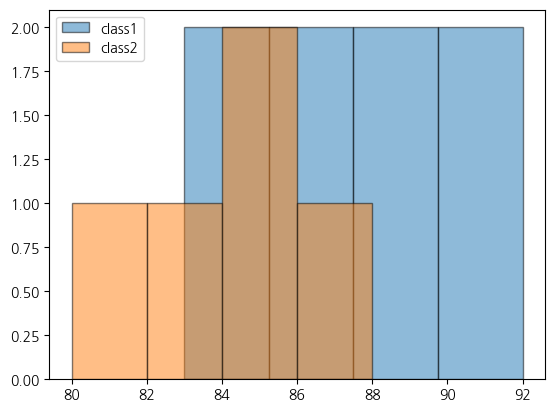

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import koreanize_matplotlib

plt.hist(class1, alpha = 0.5, bins = "auto", edgecolor = "black")
plt.hist(class2, alpha = 0.5, bins = "auto", edgecolor = "black")
plt.legend(["class1", "class2"])
plt.show()

In [5]:
# 차이가 아니라 각각 정규분포인지 확인하는 것이므로  각각에 대해서 샤피로 써줄 것
print(stats.shapiro(class1))
print(stats.shapiro(class2))
# 둘 다 p > 0.05  =>  귀무가설 기각x. 둘 다 정규분포를 따른다 

ShapiroResult(statistic=0.9981893537736595, pvalue=0.999986994137081)
ShapiroResult(statistic=0.9917398436295009, pvalue=0.9854182266624983)


In [8]:
# 분산이 동일한지 검정
stats.levene(class1, class2)        
# p > 0.05  =>  귀무가설 기각x. 분산이 동일하다 

LeveneResult(statistic=0.0027925869510027727, pvalue=0.958802951766629)

In [10]:
# equal_var = True  //  독립 표본 검정 
# 분산이 동일하지 않으면, Welch t-검정 수행  ;  equal_var = False로 

stats.ttest_ind(class1, class2, equal_var = True)      # 얘는 분산이 동일할 때
# p < 0.05  =>  귀무가설 기각.  반별 수학 평균 점수는 같다고 할 수 없다. (= 다르다 )

TtestResult(statistic=2.2108140580092237, pvalue=0.04914857789252186, df=11.0)

In [11]:
# 귀무가설 : 반별 수학 평균 점수는 같다.
# 대립가설 : 1반이 2반보다 평균점수가 더 높다.

stats.ttest_ind(class1, class2, equal_var = True,
               alternative = "greater")  
# p < 0.05  =>  귀무가설 기각.  1반이 2반보다 반별 수학 평균 점수가 더 높다 

TtestResult(statistic=2.2108140580092237, pvalue=0.02457428894626093, df=11.0)

* 만약 정규성을 하나라도 따르지 않았다면?

In [14]:
# 맨 휘트니 U 검정: 데이터 순위를 비교해서 두 집단의 중앙값 차이 비교

stats.mannwhitneyu(class1, class2)

# class1 : 3,5,7 -> 2 + 3 + 5 = 10
# class2 : 2,6,8 -> 1 + 4 + 6 = 11

2(1), 3(2), 5(3), 6(4), 7(5), 8(6)

MannwhitneyuResult(statistic=33.0, pvalue=0.06652637566016167)

## 연습문제
1. 1반과 2반의 평균 점수 차이가 있는지 유의 수준 0.05 하에서 가설 검정하시오.

* 귀무가설: 반별 수학 평균 점수는 같다.
* 대립가설: 2반 수학 평균 점수가 더 높다.

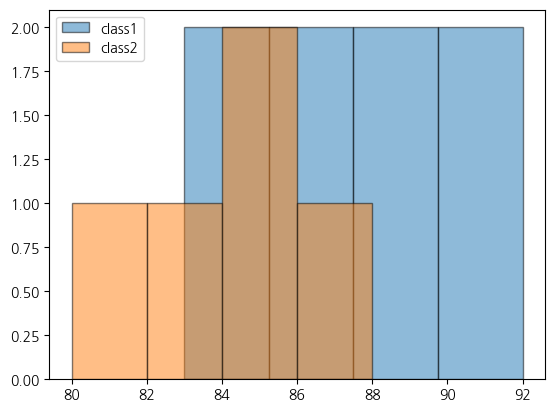

In [15]:
class1 = [85, 90, 92, 88, 86, 89, 83, 87]
class2 = [80, 82, 88, 85, 84]

plt.hist(class1, alpha = 0.5, bins = "auto", edgecolor = "black")
plt.hist(class2, alpha = 0.5, bins = "auto", edgecolor = "black")
plt.legend(["class1", "class2"])
plt.show()

In [16]:
print(stats.shapiro(class1))
print(stats.shapiro(class2))
# 둘다 p > 0.05  =>  귀무 기각x. 둘다 정규분포 따른다 

ShapiroResult(statistic=0.9981893537736595, pvalue=0.999986994137081)
ShapiroResult(statistic=0.9917398436295009, pvalue=0.9854182266624983)


In [17]:
stats.levene(class1, class2) 
# p > 0.05  =>  귀무 기각x. 둘의분산 동일하다

LeveneResult(statistic=0.0027925869510027727, pvalue=0.958802951766629)

In [19]:
stats.ttest_ind(class1, class2, equal_var = True, alternative = "greater")
# p < 0.05  =>  귀무가설 기각.  반별 수학 평균 점수는 같다고 할 수 없다. 1반이 2반보다 평균 점수가 더 높다 

TtestResult(statistic=2.2108140580092237, pvalue=0.02457428894626093, df=11.0)

2. 1반과 2반의 평균 점수 차이가 있는지 유의 수준 0.05 하에서 가설 검정하시오.
* 귀무가설: 반별 수학 평균 점수는 같다.
* 대립가설: 2반 수학 평균 점수가 더 높다.

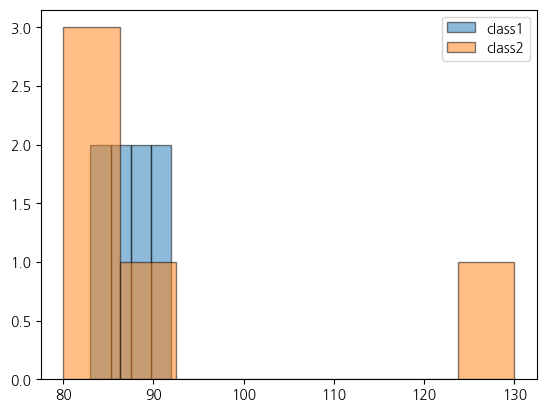

In [21]:
class1 = [85, 90, 92, 88, 86, 89, 83, 87]
class2 = [80, 82, 88, 85, 130]

plt.hist(class1, alpha = 0.5, bins = "auto", edgecolor = "black")
plt.hist(class2, alpha = 0.5, bins = "auto", edgecolor = "black")
plt.legend(["class1", "class2"])
plt.show()

In [22]:
print(stats.shapiro(class1))
print(stats.shapiro(class2))
# class1은 p > 0.05 => 정규분포 따르나, //  class2는 정규분포 따르지 x.

ShapiroResult(statistic=0.9981893537736595, pvalue=0.999986994137081)
ShapiroResult(statistic=0.6880497349322277, pvalue=0.007151570728885509)


In [23]:
stats.mannwhitneyu(class1, class2)
# p > 0.05  =>  귀무가설 기각x. 두 반의 반별 수학 평균 점수는 같다 

MannwhitneyuResult(statistic=26.0, pvalue=0.4194714434612976)

3. 한 연구자가 특정 튜터링 프로그램이 학생들의 시험 성적에 미치는 영향을 조사하고자 하였습니다. 이를 위해 두 개의 독립 집단을 선정하였습니다. 두 그룹의 평균 시험 점수에 차이가 있는지 검정하시오. (유의수준 0.05)

* 그룹 A: 튜터링 프로그램에 참여한 학생들의 시험 점수
* 그룹 B: 튜터링 프로그램에 참여하지 않은 학생들의 시험 점수

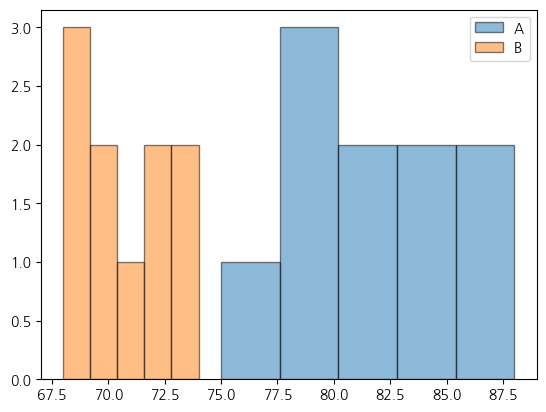

In [25]:
A = [78, 85, 82, 88, 75, 80, 79, 83, 81, 87]
B = [70, 72, 68, 74, 69, 71, 73, 70, 68, 72]

plt.hist(A, alpha = 0.5, bins = "auto", edgecolor = "black")
plt.hist(B, alpha = 0.5, bins = "auto", edgecolor = "black")
plt.legend(["A", "B"])
plt.show()

In [26]:
print(stats.shapiro(A))
print(stats.shapiro(B))
# 둘 다 p > 0.05 => 귀무가설 기각x. 정규분포 따른다 

ShapiroResult(statistic=0.9808738685761099, pvalue=0.9696722802646456)
ShapiroResult(statistic=0.9498823422157764, pvalue=0.6671086821934071)


In [27]:
stats.levene(A, B) 
# p > 0.05  =>  귀무가설 기각x. 둘의분산 동일하다

LeveneResult(statistic=3.509532062391682, pvalue=0.07734786417119568)

In [28]:
stats.ttest_ind(A, B, equal_var = True)
# p < 0.05  =>  귀무가설 기각.  두 그룹의 평균 시험 점수에 차이가 없다고 할 수 없다. (= 차이가 있다.)

TtestResult(statistic=7.686207367576637, pvalue=4.3123377367616994e-07, df=18.0)

In [30]:
stats.ttest_ind(A, B, equal_var = True,
               alternative = "greater")  
# p < 0.05  =>  귀무가설 기각.  튜터링 프로그램에 참여한 그룹의 평균 시험 점수가 참여하지 않은 그룹의 시험 점수보다 더 높다

TtestResult(statistic=7.686207367576637, pvalue=2.1561688683808497e-07, df=18.0)